In [107]:
import numpy as np

WIDTH, HEIGHT = 800, 600

N = 18
NOISE_SCALE = 1
DIM = 4

PADDING_PERC = 0.1

class Curve():
    def __init__(self, x, y, w, h, j):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.stroke_weight = max(1, round(w/100))
        
        self.x_values = np.linspace(x, x + w, N)
        self.noise_values = [noise(i * NOISE_SCALE, j) for i in range(N)]
        self.y_values = [remap(val, 0, 1, y + h * (1 - PADDING_PERC), y + h * PADDING_PERC) for val in self.noise_values]
        
    def __repr__(self):
        return f'Curve(x={self.x}, y={self.y}, w={self.w}, h={self.h}, x_values={self.x_values}, y_values={self.y_values})'
    
    def display(self):
        # Display curve
        with push_style():
            stroke_weight(self.stroke_weight)
            with begin_shape():
                curve_vertices([x, y] for x, y in zip(self.x_values, self.y_values))
                
        # Display red dot
        with push_style():
            for x, y, noise_val in zip(self.x_values[1:-1], self.y_values[1:-1], self.noise_values[1:-1]):
                if (noise_val >=  0.75):
                    fill(255, 0, 0, 200)
                    no_stroke()
                    circle(x, y, self.stroke_weight * 5)
                    
        

def setup():
    size(WIDTH, HEIGHT)
    background(0)
    stroke(255)
    fill(0)
    no_loop()
    
def draw():
    for i in range(DIM):
        for j in range(DIM):
            curv = Curve(i * width/DIM, j * height/DIM, width/DIM, height/DIM, i * DIM + j)
            curv.display()   

run_sketch()

In [108]:
save_frame("./dataviz_2_0001.png", use_thread=True)

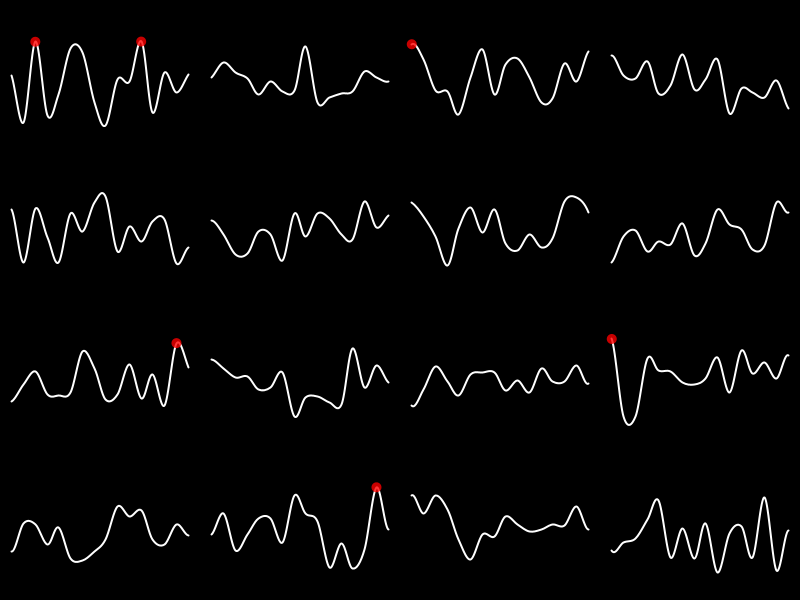

In [436]:
# For details about the algorithm, see: https://www.youtube.com/watch?v=7eDGJ5okDGw
# Values still need to be tweaked

import numpy as np

WIDTH, HEIGHT = 650, 650

N = 31
NOISE_SCALE = 0.1
NUM_CURVES = 100

PADDING_V = HEIGHT/10
PADDING_H = WIDTH/6

class Curve():    
    def __init__(self, x, y, w, h, j):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.stroke_weight = 2
        
        center = (x + (x + w))/2
        distance_from_center = lambda u, v: pow(remap(abs(u - center), w/2, 0, 0, 1), v)
        
        self.x_values = np.linspace(x, x + w, N)
        self.noise_values = np.array([noise(x * NOISE_SCALE, j) * 0.02 for x in self.x_values])
        self.noise_values += np.array([noise(x * NOISE_SCALE* 2, j) * 0.1 * distance_from_center(x, 3) for x in self.x_values])
        self.noise_values += np.array([noise(x * (NOISE_SCALE * 5), j) * 1.2 * distance_from_center(x, 3) for x in self.x_values]) # [0, 0.1]

        self.y_values = np.array([remap(val, 0, 1, y + h, y) for val in self.noise_values])
        
    def __repr__(self):
        return f'Curve(x={self.x}, y={self.y}, w={self.w}, h={self.h}, x_values={self.x_values}, y_values={self.y_values})'
    
    def display(self):
        # Display curve
        with push_style():
            stroke_weight(self.stroke_weight)
            fill(13, 10, 5)
            with begin_shape():
                curve_vertices(np.stack((self.x_values, self.y_values), axis=-1))
          
def setup():
    size(WIDTH, HEIGHT)
    background(13, 10, 5)
    stroke(255)
    no_loop()
    
def draw():
    for i in range(NUM_CURVES):
        curv = Curve(PADDING_H, 15 + i * HEIGHT/(1.4 * NUM_CURVES) , width - 2 * PADDING_H, 85, i)
        curv.display() 

run_sketch()

In [435]:
save_frame("./dataviz_2_0002.png", use_thread=True)

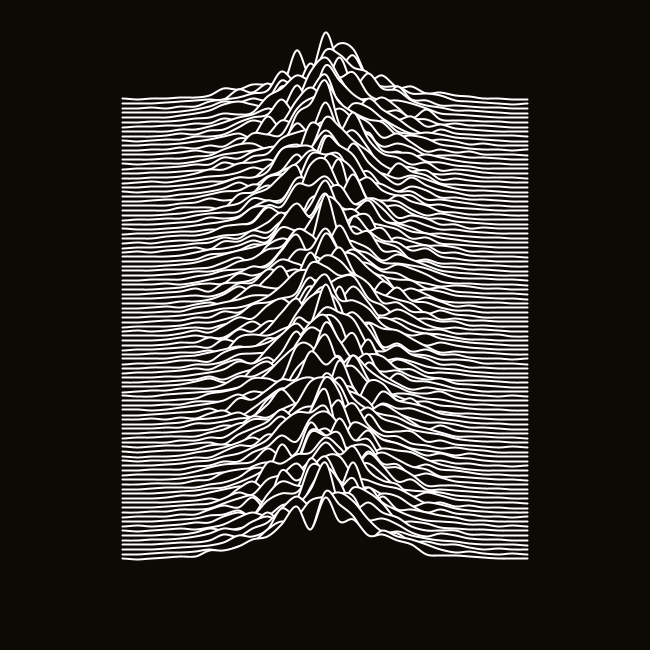